# Learning objectives

## Skills 

* Write Python scripts and programs using common language constructs in the read-eval-print-loop (REPL), “Jupyter Notebooks”, as well as separate self-contained programs. 

* Download files from the web programmatically, as well as reading most common file formats programmatically. 

* Create various types of plots programmatically to share insight into data. 

* Apply Python’s scientific libraries and some of the most prominent algorithms in data science for problem solving and complexity reduction. 

* Programmatically, process images and streams of images. 

* Automate repetitive and boring tasks for example for data collection or UI testing. 

 



## Competencies 

* collect various types of data 

* formulate problems about this data 

* implement solutions to given problem statements 

* present results

*  gain experiences in code reviews

## Exam
* Group presentation of 10 minutes followed by 10 minutes of questions per student (minimum 30 minutes). 

* The exam is based on a presentation of the student’s group project and it is facilitated by an interactive programming environment. Additionally, this includes a discussion of the project’s solutions with respect to the main topics of the course.
* For the main topics questions will be known to the students in advance. 

# TOC

- Pandas
  - Loading and reading data
  - Series
    - 1 dimensional data structure
  - DataFrame
    - 2 dimensional data structure
    - `pandas.DataFrame( data, index, columns, dtype, copy)`
    - columns can be of different types
    - data can be lists, dicts, maps, ndarrays.

## Initialising `numpy` and `matplotlib`

In [1]:
%pylab inline 
# %pylab is a magic function in ipython, and triggers the import of various modules within Matplotlib

Populating the interactive namespace from numpy and matplotlib


#### Above magic function equals
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
```
Magic function: `%matplotlib inline` is to show plots directly below code as part of the notebook.

# Pandas: Series, Data Frames and Time Series

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the [intro to Pandas:](http://pandas.pydata.org/pandas-docs/stable/10min.html)


## Pandas vs Numpy
1. In pandas we have 1D Series and 2D DataFrame in numpy we have multi dimensional ndArrays
2. In DataFrame we have column names (like in sql) in ndArrays we have data slicing based in indices
3. In DataFrame we can have multiple datatypes in different columns
  
![](images/pandas_vs_numpy.png)  

As we will refer to Panda's classes and functions often in code, we allways import the module as `pd`.

In [2]:
import pandas as pd

In [3]:
print(pd.__doc__)
#pd.read_csv?


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

## Learning a new framework

1. Study the API
  * https://pandas.pydata.org/pandas-docs/stable/reference/index.html

## Getting data with Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

```python
pd.read_csv(...)
```

In [6]:
data_frame = pd.read_csv('data/befkbhalderstatkode.csv')
#list([]).append()

In [8]:
df = pd.read_csv('data/befkbhalderstatkode.csv')
df.head()

,AAR,BYDEL,ALDER,STATKODE,PERSONER
0,2015,1,0,5100,614
1,2015,1,0,5104,2
2,2015,1,0,5106,1
3,2015,1,0,5110,1
4,2015,1,0,5120,4


* What are the columns in the dataset?

In [10]:
df.columns

Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')

In [11]:
type(df)

pandas.core.frame.DataFrame

* What is the dimensionality of the dataframe?

In [12]:
df.shape

(542517, 5)

### Getting a column of data by name:
What data type is the column?
```python
df['ALDER']
```


In [13]:
type(df['ALDER'])

pandas.core.series.Series

### Slicing a column of data by index

In [14]:
print(type(df.iloc[:,0]))
df.iloc[:,0] # all rows of first column

<class 'pandas.core.series.Series'>


0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
542512    1992
542513    1992
542514    1992
542515    1992
542516    1992
Name: AAR, Length: 542517, dtype: int64

### Slicing a row of data by index
Notice how we get a Series object with labels being the column names

In [15]:
first_row = df.iloc[0,:] # or just df.iloc[0]
print(type(first_row))
first_row

<class 'pandas.core.series.Series'>


AAR         2015
BYDEL          1
ALDER          0
STATKODE    5100
PERSONER     614
Name: 0, dtype: int64

In [16]:
first_row['AAR']

2015

* Get the second element of the third column using the `iloc` method

In [17]:
# iloc (integer location method)
col = 2
row = 1
df.iloc[row][col] 

0

In [18]:
import numpy 
import pandas
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
print(type(data))
df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

<class 'numpy.ndarray'>


## Class exercise slicing dataframe
Using the file: befkbhalderstatkode.csv 
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result: (Hint: print(df);print(df.index);print(df.columns):     

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```
(Hint: use the pd.DataFrame(data=, column=, index=) arguments)
2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

## `Pandas Series` (like dictionary with added functionality ...)

A `Series` is a labeled array (one-dimensional ndarrays with axis-labels) capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The data structure is similar to the python dictionary, but it differs in that pandas series has a lot of methods for complex data manipulation.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can create a Series by passing a list of values, letting Pandas create a default integer index.

In [19]:
# Pandas Series with multiple data types
s = pd.Series([1, 3, 5, np.nan, 'seks', 8])
print(s,'\n---------------------')
s = pd.Series(['seks','fem','fire'],[6,5,4]) # in pd.Series we can provide any keys we like to the data
print(s)

0       1
1       3
2       5
3     NaN
4    seks
5       8
dtype: object 
---------------------
6    seks
5     fem
4    fire
dtype: object


* Get the third column in the `befkbhalderstatkode.csv` dataset and notice how we get a Pandas Series object with labels (keys) as numerical indices.

In [20]:
#print(type(df['ALDER']))
df 

,Col1,Col2,col3
Row1,1,2,3
Row2,4,5,6
Row3,7,8,9


## World bank data
For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. This dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions*.

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [21]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Date': 'Mon, 20 Jul 2020 13:01:00 GMT', 'Content-Type': 'application/zip', 'Content-Length': '77231', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=7c2b11fa018cc2a991aa7ed18f9a292a; Path=/, TS01fa65e4=01359ee9761c47d70ac7abdcd24beb46f917099c0b172658e973fb6f3c77d8e8d2bca76c43a0595d6694b8b44dd7b5d56381a2e2bf; Path=/, TS019865bf=0114ae29262002b6238147e4ca8d435b9b3c453a5328af497fefacf2fb81d5c89cdb6a1a619d5c29ea15e3e35cb611544a9742dd4ba8e813661de4e281d38c10976674c589; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Mon, 20 Jul 2020 13:01:00 GMT', 'Last-Modified': 'Mon, 20 Jul 2020 13:00:59 GMT', 'Content-Disposition': 'attachment; filename=API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.zip', 'Request-Context': 'appId=cid-v1:da002513-bd8b-4441-9f30-737944134422'}


In [22]:
# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]

# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.zip


In [23]:
%%bash
ls -ltrh | tail
#man ls

-rwxrwxr-x  1 jovyan  1000  20K Jul 20 12:14 02-0b Functions.ipynb
-rw-rw-r--  1 jovyan  1000 3.7K Jul 20 12:32 03-Exercise.ipynb
-rw-r--r--  1 jovyan users 379K Jul 20 12:40 bones_in_london.txt
drwxrwxr-x  5 jovyan  1000 4.0K Jul 20 12:42 modules
-rwxrwxr-x  1 jovyan  1000 115K Jul 20 12:42 03-1 Object-oriented Programming.ipynb
drwxrwxr-x  2 jovyan  1000 4.0K Jul 20 12:55 data
-rwxrwxr-x  1 jovyan  1000 213K Jul 20 12:57 04 Numpy.ipynb
-rw-rw-r--  1 jovyan  1000 4.2K Jul 20 12:58 04-Exercise.ipynb
-rw-rw-r--  1 jovyan  1000  18K Jul 20 12:59 05-1 DateTime.ipynb
-rw-r--r--  1 jovyan users  76K Jul 20 13:01 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.zip


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [24]:
import zipfile
# extract content of zip file in current folder
zipfile.ZipFile(fname, 'r').extractall('.')

In [25]:
#%less API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv

In [28]:
data = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv', skiprows=4)
columns_names = data.columns
print('column names:\n',list(columns_names),'\n\n')
countries = data['Country Name']
print("{} countries are in the dataset.".format(len(countries)))
print('countries are of data type: ',type(countries))
print(list(countries))
data

column names:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'] 


264 countries are in the dataset.
countries are of data type:  <class 'pandas.core.series.Series'>
['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,2500.894,1349.456,861.745,872.746,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,12240.446,10755.311,10014.577,9809.225,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,30340.758,33399.036,32617.965,34763.160,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,5240.143,4910.113,5064.127,5716.853,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,491.378,487.711,476.710,462.042,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,3633.997,2665.909,3887.020,2918.932,3633.997,3931.024,...,19666.121,18668.697,25496.651,22698.730,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,...,470582.443,468770.945,466376.394,489771.854,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,3278.298,3916.356,...,2937.267,3667.000,3956.693,4503.076,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Create a new pandas Series with countries as labels and a random number as values
import random
# random.sample takes a population and a sample size k and returns k random members of the population.
random_val_pr_country = pd.Series(random.sample(range(1,len(countries)+1),len(countries)),index=countries)
random_val_pr_country.sort_values()

Country Name
Sub-Saharan Africa                               1
Netherlands                                      2
West Bank and Gaza                               3
High income                                      4
Lebanon                                          5
                                              ... 
East Asia & Pacific (excluding high income)    260
Upper middle income                            261
India                                          262
Eswatini                                       263
Congo, Dem. Rep.                               264
Length: 264, dtype: int64

In [30]:
# instansiate Series from dict
new_series = pd.Series(dict({'a':3,'b':6,'c':9}))
new_series

a    3
b    6
c    9
dtype: int64

## Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

# `DataFrame`

In notebook: "05 Subprocess" we looked at the CO2 emissions dataset with commandline tools.
And we then uses Pandas Series object to plot emissions for Denmark and Uruguay

Since `Series` are one-dimensional data structures, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`.

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or **a dict of Series objects**.

In the following we concatenate two `Series`to form a `DataFrame`.

We will use pandas concat() method [get a good explanation here](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [31]:
# reference to check graph: https://www.klimadebat.dk/grafer_co2udledning.php

# recreate the to Series ts_dk and ts_ury from notebook 05-2 without the use of bash commands
years = data.columns[4:-1]
#data.loc[data['Country Name'=='Denmark']]
data.columns
list(data['Country Name'])
ts_dk = data.loc[data['Country Name']=='Denmark'].iloc[0][4:-6]
ts_ury = data.loc[data['Country Name']=='Uruguay'].iloc[0][4:-6]
ts_ury

1960    4319.73
1961    4121.71
1962     4011.7
1963    4319.73
1964    4558.08
1965     5522.5
1966    5405.16
1967    4884.44
1968    4884.44
1969    5595.84
1970    5742.52
1971    5808.53
1972    6076.22
1973    5775.52
1974    5683.85
1975    5969.88
1976    5896.54
1977    5650.85
1978    5742.52
1979     6277.9
1980    5837.86
1981    5375.82
1982    4873.44
1983    3817.35
1984    3450.65
1985    3296.63
1986    3179.29
1987    3560.66
1988    4807.44
1989    4880.78
1990    3993.36
1991    4554.41
1992    5170.47
1993    4466.41
1994     4066.7
1995    4591.08
1996    5441.83
1997    5555.51
1998    5687.52
1999    6725.28
2000    5306.15
2001     5089.8
2002    4620.42
2003    4598.42
2004    5610.51
2005    5775.52
2006    6648.27
2007    6002.88
2008    8265.42
2009    8060.07
2010    6387.91
2011    7763.04
2012    8694.46
2013    7587.02
2014    6747.28
Name: 248, dtype: object

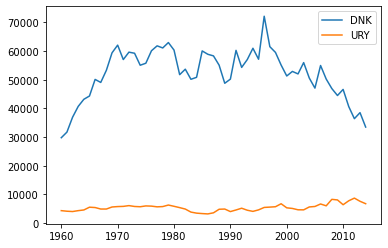

In [32]:
ts = pd.concat([ts_dk, ts_ury], axis=1, keys=['DNK', 'URY']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis

ts.plot()

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [33]:
dates = pd.date_range('20200302', periods=6) # create 6 dates from march 2, 2020
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
print(dates)
print(df)
#df.describe()

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-03-02  2.610396  0.123567  0.667599  0.226696
2020-03-03  0.670684  1.251422  1.180080 -0.601053
2020-03-04  0.697854 -0.139666  0.263702 -1.165416
2020-03-05 -0.975502 -0.602396 -2.611723 -0.012151
2020-03-06  0.476532  0.243581  1.171405 -0.078366
2020-03-07  1.501402  0.489837 -0.583011 -1.973643


## Exercise pandas dataframe
1. Using the dataframe in the above cell find:
    1. Mean, Min, Max values for all 4 columns
    2. The 2 dates with the largest and smallest sum (by column)
    3. All A's and B's that are positive

## Working with real data
Since we do not want to work on random example data. We will have a look on the military expenditures of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [34]:
import requests

url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]
print(response.headers)

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded',fname)
#print('Downloaded {}'.format(fname))

{'Date': 'Mon, 20 Jul 2020 13:01:30 GMT', 'Content-Type': 'application/zip', 'Content-Length': '40701', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=2f4d39862a2fa1b0b0b0c4ad37e6251a; Path=/, TS01fa65e4=01359ee9766429b5ddeec95c272850a02b17d67da6e322dd2877bbe9b49988bb820826e408a2565eda1572cd22002dde823d983449; Path=/, TS019865bf=01689d383663234db9ad2d31bb4c70bbd63620f44c2813bc958fb39e0523c2c3e9eeb6e5a795c5c52765984d1373e9af333a463c163e6b15697080007862f639501d9d7111; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Mon, 20 Jul 2020 13:01:31 GMT', 'Last-Modified': 'Mon, 20 Jul 2020 13:01:30 GMT', 'Content-Disposition': 'attachment; filename=API_MS.MIL.XPND.CN_DS2_en_csv_v2_1221932.zip', 'Request-Context': 'appId=cid-v1:da002513-bd8b-4441-9f30-737944134422'}
Downloaded API_MS.MIL.XPND.CN_DS2_en_csv_v2_1221932.zip


In [35]:
import os
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [36]:
%%bash
ls -ltrh | tail

-rw-rw-r--  1 jovyan  1000 4.2K Jul 20 12:58 04-Exercise.ipynb
-rw-rw-r--  1 jovyan  1000  18K Jul 20 12:59 05-1 DateTime.ipynb
-rw-r--r--  1 jovyan users  76K Jul 20 13:01 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.zip
-rw-r--r--  1 jovyan users  466 Jul 20 13:01 Metadata_Indicator_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
-rw-r--r--  1 jovyan users  31K Jul 20 13:01 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
-rw-r--r--  1 jovyan users 181K Jul 20 13:01 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1217566.csv
-rwxrwxr-x  1 jovyan  1000 194K Jul 20 13:01 05-2 pandas.ipynb
-rw-r--r--  1 jovyan users 1.7K Jul 20 13:01 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_1221932.csv
-rw-r--r--  1 jovyan users  31K Jul 20 13:01 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2_1221932.csv
-rw-r--r--  1 jovyan users 138K Jul 20 13:01 API_MS.MIL.XPND.CN_DS2_en_csv_v2_1221932.csv


In [46]:
from glob import glob


milit_files = glob('data/API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv')
expenditure_csv = milit_files[0]
expenditure_csv

'data/API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv'

In [49]:
%%bash
head ./data/Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv

﻿"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"MS.MIL.XPND.CN","Military expenditure (current LCU)","Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country). Excluded are civil defense and current expenditures for previous military activities, such as for veterans' benefits, demobilization, conversion, and destruction of weapons. This definition cannot be app

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [50]:
import pandas as pd


expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,1.431083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332160e+11,4.523560e+11,5.081750e+11,5.012240e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,4.696200e+07,5.103600e+07,5.366700e+07,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.335875e+10,3.685940e+10,3.976155e+10,4.224380e+10,4.451422e+10,4.666570e+10,4.854898e+10,4.821218e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,3.204640e+09,3.955630e+09,NaN,NaN


## Viewing Data

In [51]:
expenditures.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,1.431083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332160e+11,4.523560e+11,5.081750e+11,5.012240e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
expenditures.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,4.696200e+07,5.103600e+07,5.366700e+07,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.335875e+10,3.685940e+10,3.976155e+10,4.224380e+10,4.451422e+10,4.666570e+10,4.854898e+10,4.821218e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,3.204640e+09,3.955630e+09,NaN,NaN
263,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,15600000.0,...,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,NaN,NaN


In [53]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [54]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [55]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        14310833333.3333, nan, nan],
       ['Angola', 'AGO', 'Military expenditure (current LCU)', ...,
        501224000000.0, nan, nan],
       ...,
       ['South Africa', 'ZAF', 'Military expenditure (current LCU)', ...,
        48212175000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3955630000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        420364000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [56]:
len(list(expenditures['Country Name']))

264

In [57]:
list(expenditures['Country Code'])

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARB',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CEB',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSS',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAP',
 'EAR',
 'EAS',
 'ECA',
 'ECS',
 'ECU',
 'EGY',
 'EMU',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUU',
 'FCS',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HIC',
 'HKG',
 'HND',
 'HPC',
 'HRV',
 'HTI',
 'HUN',
 'IBD',
 'IBT',
 'IDA',
 'IDB',
 'IDN',
 'IDX',
 'IMN',
 'IND',
 'INX',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',


### Selection by Indexes

In the following we index the third row directly.

In [58]:
# get row 3
albania = expenditures.iloc[3]
print(albania)

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object


In [59]:
# using .loc to extract by label (row or column)
expenditures.loc[3]

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object

In [60]:
expenditures.iloc[3:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# extract sub set of [rows,columns]
expenditures.iloc[3:5, 4:-1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [62]:
df = expenditures



Using the `isin()` method for filtering:

In [63]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
38,China,CHN,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.914702e+11,9.935000e+11,1.114496e+12,1.233430e+12,1.333262e+12,1.436617e+12,1.541448e+12,1.654051e+12,NaN,NaN
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.419000e+10,2.496100e+10,2.670000e+10,NaN,NaN
200,Russian Federation,RUS,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.063740e+12,2.512500e+12,2.812900e+12,3.250500e+12,4.047400e+12,4.644800e+12,3.879916e+12,3.849569e+12,NaN,NaN
249,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,...,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.961046e+11,6.001064e+11,6.058029e+11,6.487983e+11,NaN,NaN


Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [64]:
# get indices for the 4 countries in question:
c_code_df = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_code_df

38     CHN
56     DNK
200    RUS
249    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

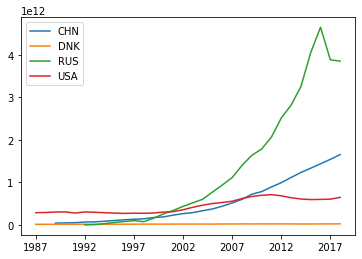

In [65]:
import matplotlib.pyplot as plt

# get only the 4 countries from df and only cols: 31-end (only 1987 and up)
#print(df.iloc[c_code_df.index,31:-1])
ts_df = df.iloc[c_code_df.index, 31:-1].T
ts_df = ts_df.rename(columns=dict(c_code_df))
ts_df
ts_df.plot()

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [66]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2020-07-17\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.1428\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'122.53\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'26.682\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4453\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.91078\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'353.72\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.4827\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.8422\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'10.3330\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.0753\'/>\n\t\t\t<Cube currency=\'ISK\' rate=\'160.20\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'10.5995\'/>\n\t\t\t<Cube cur

In [74]:
from bs4 import BeautifulSoup
# Will be covered in week 7 on webscraping

xml = BeautifulSoup(response.text, 'html.parser')
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']
print(xml.cube)

<cube>
<cube time="2020-07-17">
<cube currency="USD" rate="1.1428"></cube>
<cube currency="JPY" rate="122.53"></cube>
<cube currency="BGN" rate="1.9558"></cube>
<cube currency="CZK" rate="26.682"></cube>
<cube currency="DKK" rate="7.4453"></cube>
<cube currency="GBP" rate="0.91078"></cube>
<cube currency="HUF" rate="353.72"></cube>
<cube currency="PLN" rate="4.4827"></cube>
<cube currency="RON" rate="4.8422"></cube>
<cube currency="SEK" rate="10.3330"></cube>
<cube currency="CHF" rate="1.0753"></cube>
<cube currency="ISK" rate="160.20"></cube>
<cube currency="NOK" rate="10.5995"></cube>
<cube currency="HRK" rate="7.5380"></cube>
<cube currency="RUB" rate="81.8409"></cube>
<cube currency="TRY" rate="7.8413"></cube>
<cube currency="AUD" rate="1.6360"></cube>
<cube currency="BRL" rate="6.0839"></cube>
<cube currency="CAD" rate="1.5510"></cube>
<cube currency="CNY" rate="7.9975"></cube>
<cube currency="HKD" rate="8.8617"></cube>
<cube currency="IDR" rate="16793.45"></cube>
<cube currency="

In [75]:


currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency) # create a new dict with given keys
#print(rate_dict)
for element in rate_list:
    if element['currency'] in currency:
        rate_dict[element['currency']] = float(element['rate'])
        print(element['rate'])
rate_dict

1.1428
7.4453
81.8409
7.9975


{'USD': 1.1428, 'DKK': 7.4453, 'RUB': 81.8409, 'CNY': 7.9975}

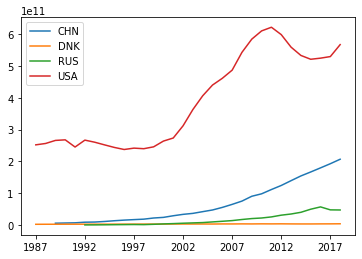

In [76]:
# get all weapons expenditure in euros
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

## Sorting dataframes

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [77]:
df.sort_index?

In [78]:
df.sort_values?

## Class Exercise
Go here and get csv data: [worldbank military expanditure](https://databank.worldbank.org/reports.aspx?source=2&series=MS.MIL.XPND.CD&country=#)
1. For 2018 find the 10 countries with the highest military expenditure in USD
2. For 2018 find the 10 countries with the highest military expenditure per capita [worldbank](https://databank.worldbank.org/source/world-development-indicators/preview/on#)(use series='Population,Total' and time='2018' and Countries= all 2017) or use [copy paste with this date into excel](https://www.worldometers.info/world-population/population-by-country/)
  - (Hint: use pd.merge() to merge the mil_exp dataframe with the population dataframe on 2 columns (country_code)
3. For 2018 find the 3 countries with the highest per capita military expenditure in the middle east
  - [countries list with iso code](middleeast_countries.csv)


## Self study exercise

Complete the comparison of military expenditures by converting all currencies to USD. Since we have yearly expenditures, use for example the yearly median for normalization. Likely, you will find an API to collect historical echange rates at Yahoo Finance.

[https://finance.yahoo.com/quote/USDRUB%3DX](https://finance.yahoo.com/quote/USDRUB%3DX)



